# Problem Set 3
Tyler Amos


# Task 1 and Imports

In [29]:
# from https://livebook.manning.com/#!/book/deep-learning-with-python/chapter-2/41

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from keras import models
from keras import layers
import pandas as pd
import random
random.seed(1234)

import matplotlib.pyplot as plt


# Task 2 - Preprocess Data

In [30]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Validation set is selected within the model
# training (see below) with this fraction
valid_frac = 10000/60000

# Task 3

# Task 3.i - Initial Model

In [3]:
network_i = models.Sequential()

# Four dense,fully connected layers
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Fifth layer using softmax
network_i.add(layers.Dense(10, activation='softmax'))
network_i.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_i = network_i.fit(train_images, train_labels, 
                                   validation_split = valid_frac,
                                   epochs=200, verbose = 0, 
                                   batch_size=512)
test_loss, test_acc = network_i.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 83us/step
test_acc: 0.9812


In [4]:
# save to csv for later
pd.DataFrame(history_training_i.history).to_csv('q3_i_results.csv')

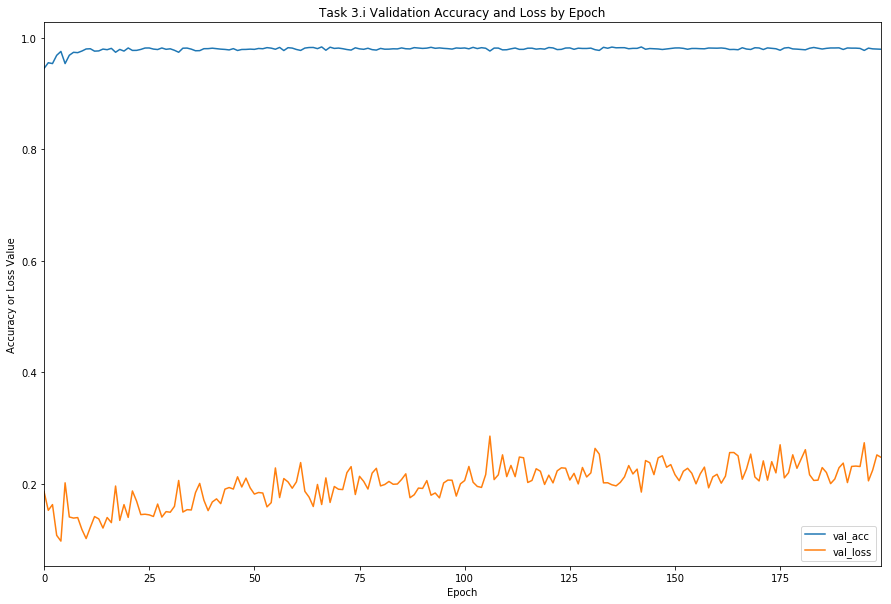

In [43]:
df = pd.read_csv('q3_i_results.csv')
df = df.iloc[:,1:]
df = df[['val_acc', 'val_loss']]
df.plot(figsize = (15,10))
plt.title("Task 3.i Validation Accuracy and Loss by Epoch")
plt.ylabel("Accuracy or Loss Value")
plt.xlabel("Epoch");


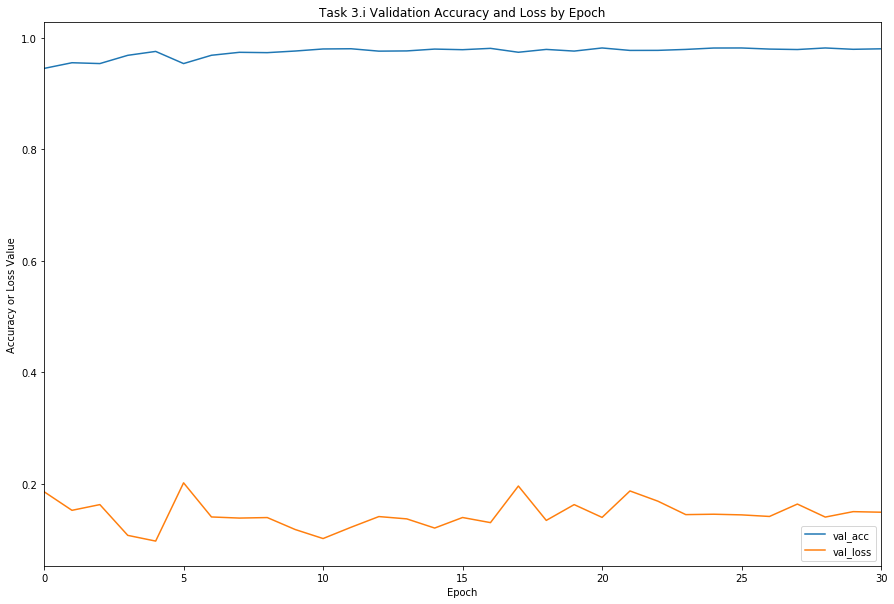

In [47]:
df = pd.read_csv('q3_i_results.csv')
df = df.iloc[:,1:]
df = df[['val_acc', 'val_loss']]
df.plot(figsize = (15,10))
plt.title("Task 3.i Validation Accuracy and Loss by Epoch")
plt.ylabel("Accuracy or Loss Value")
plt.xlim(0, 30)
plt.xlabel("Epoch");

The model begins to degrade after approximately epochs 6-10, where loss starts to increase and validation accuracy plateaus. 



# Task 3.ii - Dropout

In [6]:
network_ii = models.Sequential()


# dropout ref: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# Four dense,fully connected layers
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
# Fifth layer using softmax
network_ii.add(layers.Dense(10, activation='softmax'))

network_ii.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_ii = network_ii.fit(train_images, train_labels,
                                     validation_split = valid_frac,
                                     verbose = 0, 
                                     epochs=200, batch_size=512)
test_loss, test_acc = network_ii.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 89us/step
test_acc: 0.983


In [7]:
# save to csv for later
pd.DataFrame(history_training_ii.history).to_csv('q3_ii_results.csv', index = False)

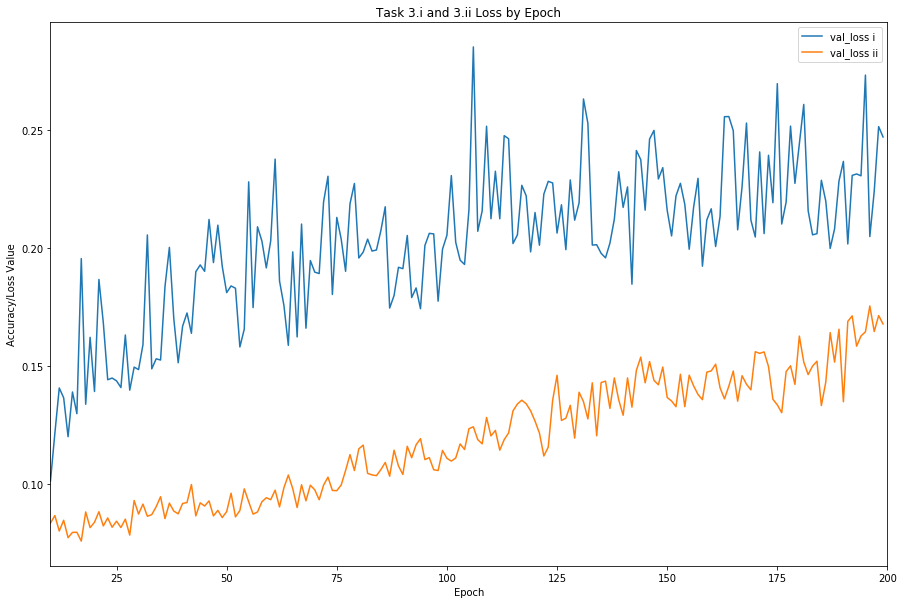

In [34]:
df = pd.DataFrame()
df['val_loss i'] = pd.read_csv('q3_i_results.csv')['val_loss']
df['val_loss ii'] = pd.read_csv('q3_ii_results.csv')['val_loss']
df.plot(figsize = (15,10))
plt.title("Task 3.i and 3.ii Loss by Epoch")
plt.ylabel("Accuracy/Loss Value")
plt.xlim(10,200)
plt.xlabel("Epoch");

Overall this model seems to perform better in terms of loss than the first model. As we can see from the above plot, the first model's validation loss starts higher and remains elevated relative to the second model's validation loss. 





# Task 3.iii, a) - L1 Regularization

In [9]:
from keras import regularizers
network_iii_a = models.Sequential()

# Four dense,fully connected layers
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))

# Fifth layer using softmax
network_iii_a.add(layers.Dense(10, activation='softmax'))
network_iii_a.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_iii_a = network_iii_a.fit(train_images, train_labels, 
                                           epochs=200, batch_size=512,
                                           validation_split = valid_frac,
                                          verbose = 0)
test_loss, test_acc = network_iii_a.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 97us/step
test_acc: 0.9563


# Task 3.iii, b) - L2 Regularization

In [16]:
# remember to check the type of regularizer
from keras import regularizers
network_iii_b = models.Sequential()

# Four dense,fully connected layers
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))

# Fifth layer using softmax
network_iii_b.add(layers.Dense(10, activation='softmax'))
network_iii_b.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_iii_b = network_iii_b.fit(train_images, train_labels, 
                                           epochs=200, batch_size=512,
                                          verbose = 0, 
                                           validation_split = valid_frac)
test_loss, test_acc = network_iii_b.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 99us/step
test_acc: 0.9498


In [19]:
# save to csv for later
pd.DataFrame(history_training_iii_a.history).to_csv('q3_iii_a_results.csv', index = False)
pd.DataFrame(history_training_iii_b.history).to_csv('q3_iii_b_results.csv', index = False)

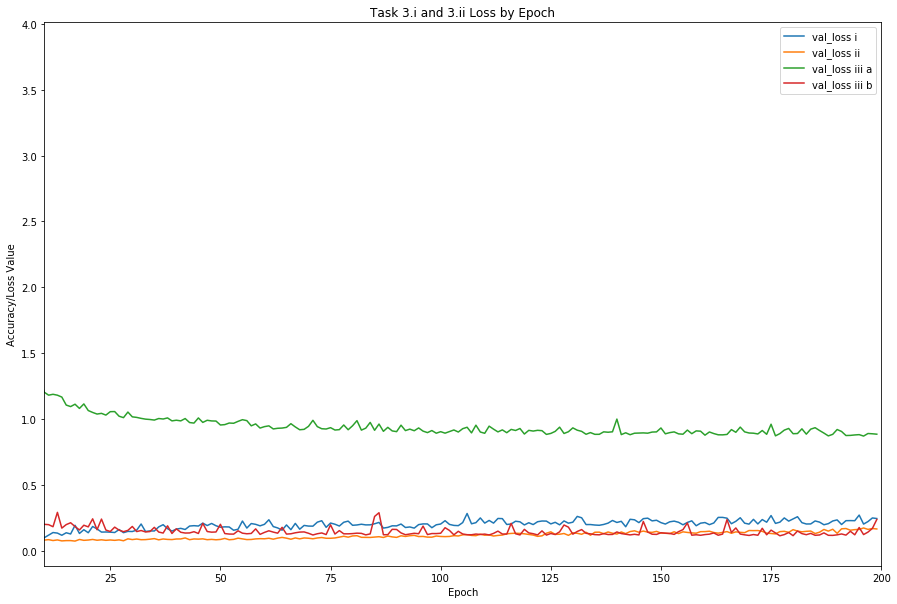

In [33]:
df = pd.DataFrame()
df['val_loss i'] = pd.read_csv('q3_i_results.csv')['val_loss']
df['val_loss ii'] = pd.read_csv('q3_ii_results.csv')['val_loss']
df['val_loss iii a'] = pd.read_csv('q3_iii_a_results.csv')['val_loss']
df['val_loss iii b'] = pd.read_csv('q3_iii_b_results.csv')['val_loss']

df.plot(figsize = (15,10))
plt.title("Task 3.i and 3.ii Loss by Epoch")
plt.ylabel("Accuracy/Loss Value")
plt.xlim(10,200)
plt.xlabel("Epoch");

It appears that the dropout model performs best overall. It's advantage is more pronounced in the early epochs, from 0 to 75. It consistently has the lowest validation loss up until the 75th epoch, after which it has similar validation loss to models i, the original, and iii, L2 regularization.  



# Task 3.iv - The Best Model

In [46]:
network_iv = models.Sequential()


# dropout ref: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# Four dense,fully connected layers
network_iv.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_iv.add(layers.Dropout(0.5))
network_iv.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_iv.add(layers.Dropout(0.5))
network_iv.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_iv.add(layers.Dropout(0.5))
network_iv.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_iv.add(layers.Dropout(0.5))
# Fifth layer using softmax
network_iv.add(layers.Dense(10, activation='softmax'))

network_iv.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_iv = network_iv.fit(train_images, train_labels,
                                     verbose = 0, 
                                     epochs=30, batch_size=512)
test_loss, test_acc = network_iv.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

10000/10000 [==============================] - 1s 98us/step
test_acc: 0.983
test_loss: 0.08799276099292647


In [45]:
# save to csv for later
pd.DataFrame(history_training_iv.history).to_csv('q3_iv_results.csv', index = False)

This model slightly outperforms the example from the book, which has a test accuracy of 97.8%, compared to our best of 98.3%. 

# Task 4 - Boston Housing

In [13]:
from keras.datasets import boston_housing
import random
random.seed(1234)

import numpy as np
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [14]:
def build_model_22():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

def import_normalize():
    from keras.datasets import boston_housing
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std

    test_data -= mean
    test_data /= std
    return train_data, train_targets, test_data, test_targets
    

train_data, train_targets, test_data, test_targets = import_normalize()

model = build_model_22()
history = model.fit(train_data, train_targets,
                            epochs=180, batch_size=29, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print("TEST MSE {}".format(test_mse_score))
print("TEST MAE {}".format(test_mae_score))


102/102 [==============================] - 0s 2ms/step
TEST MSE 14.70387103510838
TEST MAE 2.6012117722455192
